In [1]:
import pandas as pd
import sqlalchemy as sa

In [2]:
import axelrod as axl

In [3]:
import numpy as np

In [4]:
import opt_mo

In [5]:
import matplotlib.pyplot as plt

**Read in data**

In [6]:
engine = sa.create_engine('sqlite:///../data/with_gambler/main.db')

In [7]:
connection = engine.connect()

In [8]:
df_with_gambler = pd.read_sql('experiments', connection)

In [9]:
df_with_gambler.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,18.000000,0.489601,0.573224,0.559920,0.501420,0.412807,0.534458,0.490980,0.500700,0.148203,...,0.362720,0.027027,0.054054,0.355837,0.612470,0.216216,0.271817,0.549619,0.419682,3.265829
std,10.824355,0.279429,0.288541,0.288466,0.321450,0.292843,0.269286,0.317477,0.274092,0.328211,...,0.406049,0.164399,0.229243,0.423723,0.420402,0.417342,0.428751,0.424017,0.410095,0.629157
min,0.000000,0.012278,0.011655,0.023616,0.072436,0.000452,0.016881,0.000403,0.041736,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.925565
25%,9.000000,0.237965,0.345832,0.369955,0.206098,0.184254,0.364696,0.231802,0.225163,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.167284,0.000000,0.000000,0.097050,0.000000,2.868345
50%,18.000000,0.521984,0.661431,0.635000,0.465650,0.409516,0.502782,0.479773,0.508927,0.000000,...,0.224698,0.000000,0.000000,0.096253,0.819039,0.000000,0.000000,0.640767,0.411937,3.235320
75%,27.000000,0.677126,0.784911,0.795194,0.865045,0.625720,0.735970,0.764411,0.757592,0.014327,...,0.751289,0.000000,0.000000,0.846509,1.000000,0.000000,0.768426,1.000000,0.831916,3.563655
max,36.000000,0.965242,0.983214,0.960495,0.998631,0.986339,0.996817,0.999129,0.973859,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.638720


In [10]:
engine = sa.create_engine('sqlite:///../data/without_gambler/main.db')

In [11]:
connection = engine.connect()

In [12]:
df = pd.read_sql('experiments', connection)

In [13]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.465369,0.504752,0.511140,0.497352,0.499797,0.528246,0.502436,0.468291,0.244706,...,1.780000,0.070020,0.125518,0.070020,0.125518,0.079974,0.040106,0.079974,0.040106,1.290000
std,29.011492,0.277173,0.280757,0.305147,0.293344,0.312052,0.268276,0.278872,0.275244,0.398870,...,2.780088,0.256416,0.266964,0.256416,0.266964,0.272511,0.105970,0.272511,0.105970,0.956583
min,0.000000,0.012278,0.011655,0.008480,0.004392,0.000452,0.011036,0.000403,0.008806,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.750000,0.233713,0.257310,0.203881,0.247797,0.222873,0.352089,0.287986,0.207675,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,49.500000,0.451612,0.514548,0.557020,0.461747,0.510810,0.515368,0.498104,0.461888,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,74.250000,0.678346,0.712386,0.764458,0.777694,0.797417,0.730129,0.711546,0.696529,0.395951,...,1.250000,0.000000,0.068671,0.000000,0.068671,0.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,0.978355,0.983214,0.997728,0.998631,0.995061,0.999020,0.999129,0.973859,1.000000,...,25.000000,1.000000,1.000000,1.000000,1.000000,0.999962,0.739442,0.999962,0.739442,6.000000


**Is ZD code**

In [14]:
def is_ZD(vector, game=axl.game.Game(), p_c=(1 / 2)):
    """
    Check is a strategy p is ZD.
    """
    R, P, S, T = game.RPST()
    tilde_vector = np.array([vector[0] - 1, vector[1] - 1, vector[2], vector[3]])
    
    expected_tilde_vector1 = (
        P * tilde_vector[1] + P * tilde_vector[2] - R * tilde_vector[1] - R * tilde_vector[2]
    ) / (2 * P - S - T)
    chi = (
        P * tilde_vector[1] - P * tilde_vector[2] + S * tilde_vector[2] - T * tilde_vector[1]
    ) / (P * tilde_vector[1] - P * tilde_vector[2] - S * tilde_vector[1] + T * tilde_vector[2])

    return np.isclose(expected_tilde_vector1, tilde_vector[0]) and chi > 1 and vector[3] == 0


In [15]:
vector = [0.8888888888888888, 0.5, 0.3333333333333333, 0.0]

In [16]:
is_ZD(vector)

True

**Number of best responses that are ZD**

In [17]:
df.head()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
0,0,0.844422,0.757954,0.420572,0.258917,0.511275,0.404934,0.783799,0.303313,0.0,...,1,0.000078,0.114397,0.000078,0.114397,0.0,0.0,0.0,0.0,1
1,1,0.134364,0.847434,0.763775,0.255069,0.495435,0.449491,0.651593,0.788723,0.0,...,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,2,0.956034,0.947827,0.056551,0.084872,0.835499,0.735970,0.669730,0.308136,0.0,...,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
3,3,0.237965,0.544229,0.369955,0.603920,0.625720,0.065529,0.013168,0.837469,0.0,...,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
4,4,0.236048,0.103166,0.396058,0.154972,0.066515,0.401591,0.917955,0.800452,0.0,...,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1


In [18]:
df['is_ZD'] = df.apply(lambda row: is_ZD(vector=[row['mem_one_p_1'],
                                                 row['mem_one_p_2'],
                                                 row['mem_one_p_3'],
                                                 row['mem_one_p_4']]), axis=1)

In [19]:
sum(df['is_ZD'])

0

In [20]:
df['evol_is_ZD'] = df.apply(lambda row: is_ZD(vector=[row['evol_mem_one_p_1'],
                                                 row['evol_mem_one_p_2'],
                                                 row['evol_mem_one_p_3'],
                                                 row['evol_mem_one_p_4']]), axis=1)

In [21]:
sum(df['evol_is_ZD'])

0

In [22]:
df['reactive_is_ZD'] = df.apply(lambda row: is_ZD(vector=[row['reactive_p_1'],
                                                          row['reactive_p_2'],
                                                          row['reactive_p_3'],
                                                          row['reactive_p_4']]), axis=1)

In [23]:
sum(df['reactive_is_ZD'])

2

In [24]:
df['evol_reactive_is_ZD'] = df.apply(lambda row: is_ZD(vector=[row['evol_reactive_p_1'],
                                                               row['evol_reactive_p_2'],
                                                               row['evol_reactive_p_3'],
                                                               row['evol_reactive_p_4']]), axis=1)

In [25]:
sum(df['evol_reactive_is_ZD'])

0

**Finger print best responses and their evolutionary selfs**

In [26]:
probe = axl.TitForTat

In [ ]:
for index, row in df.iterrows():
    best_response = axl.MemoryOnePlayer([row['mem_one_p_1'],
                                         row['mem_one_p_2'],
                                         row['mem_one_p_3'],
                                         row['mem_one_p_4']])
    af = axl.AshlockFingerprint(best_response, probe)
    data = af.fingerprint(turns=10, repetitions=2, step=0.05, progress_bar=False)
    p = af.plot()
    p.savefig('../img/Fingerprints/AshlockFingerprint_best_response_index_%s' % index)
    
    ev_best_response = axl.MemoryOnePlayer([row['evol_mem_one_p_1'],
                                            row['evol_mem_one_p_2'],
                                            row['evol_mem_one_p_3'],
                                            row['evol_mem_one_p_4']])

    af = axl.AshlockFingerprint(ev_best_response, probe)
    data = af.fingerprint(turns=10, repetitions=2, step=0.05, progress_bar=False)
    p = af.plot()
    p.savefig('../img/Fingerprints/AshlockFingerprint_evolutionary_best_response_index_%s' % index)

**Distance between cooperation best response and evolutionary best response**

In [30]:
dimension = len(df)

In [31]:
matrix_distances = [np.eye(dimension) for _ in range(4)]
distances = []

In [32]:
for i in range(dimension):
    row = df.loc[i]
    for p in range(4):
        matrix_distances[p][i][i] = (row['evol_mem_one_p_{}'.format(p + 1)] -
                                     row['mem_one_p_{}'.format(p + 1)])

In [33]:
distances = []
for p in range(4):
    distance = []
    for i in range(dimension):
        row = df.loc[i]
        distance.append(row['evol_mem_one_p_{}'.format(p + 1)] -
                        row['mem_one_p_{}'.format(p + 1)])
    distances.append(distance)

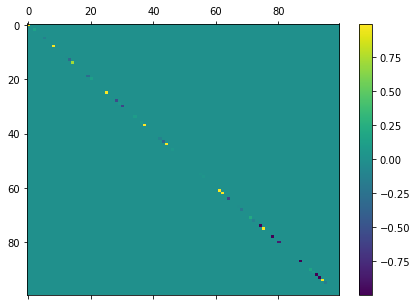

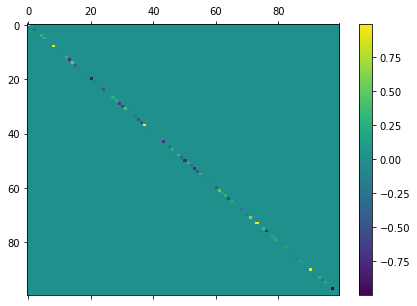

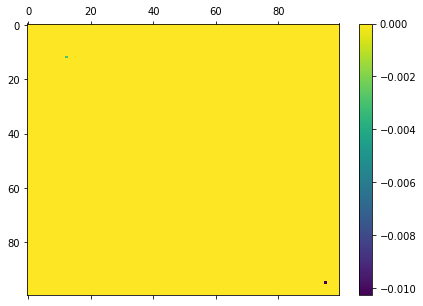

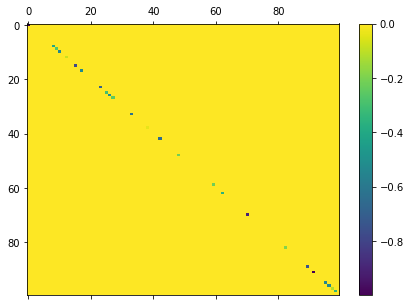

In [34]:
for distance in matrix_distances:
    fig, ax = plt.subplots(figsize=(7,5))
    im = ax.matshow(distance, aspect='auto');
    plt.colorbar(im);

**Violin plots**

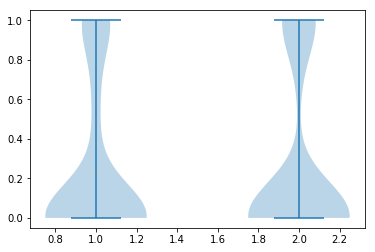

In [35]:
plt.violinplot([df['mem_one_p_1'], df['evol_mem_one_p_1']]);

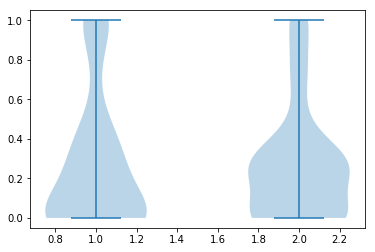

In [36]:
plt.violinplot([df['mem_one_p_2'], df['evol_mem_one_p_2']]);

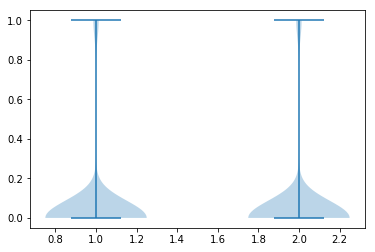

In [37]:
plt.violinplot([df['mem_one_p_3'], df['evol_mem_one_p_3']]);

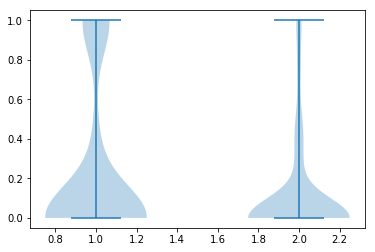

In [38]:
plt.violinplot([df['mem_one_p_4'], df['evol_mem_one_p_4']]);

In [39]:
labels = ['$p_1$', '$p_2$', '$p_3$', '$p_4$']

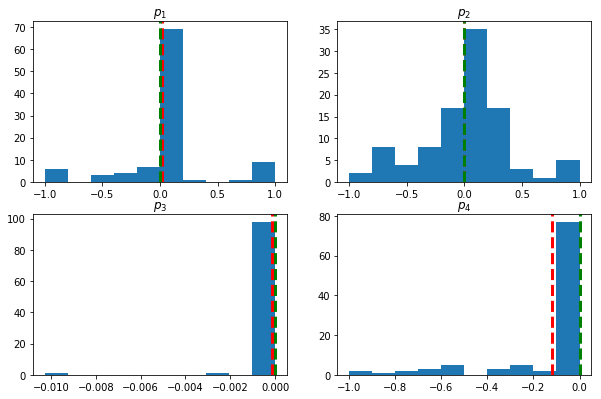

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)
   
    axes[index].hist(distance);
    axes[index].axvline(np.mean(distance), color='red', linestyle='dashed', linewidth=3)
    axes[index].axvline(np.median(distance), color='green', linestyle='dashed', linewidth=3)
    axes[index].set_title(labels[i])

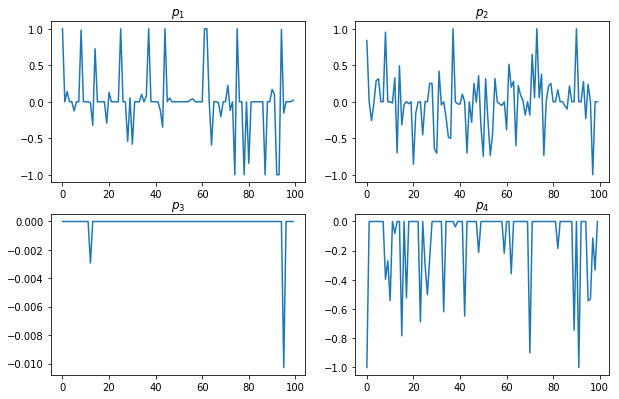

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)
   
    axes[index].plot(distance);
    axes[index].set_title(labels[i])

**Compare to longer memory**

In [42]:
utility = []
x = []
for i, row in df_with_gambler.iterrows():
    x.append(i)
    p = (row['mem_one_p_1'], row['mem_one_p_2'], row['mem_one_p_3'], row['mem_one_p_4'])
    q_1 = (row['first_opponent_q_1'], row['first_opponent_q_2'], row['first_opponent_q_3'], row['first_opponent_q_4'])
    q_2 = (row['second_opponent_q_1'], row['second_opponent_q_2'], row['second_opponent_q_3'], row['second_opponent_q_4'])
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))

In [43]:
df_with_gambler['mem_one_utility'] = utility

In [44]:
import matplotlib

In [45]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [46]:
x = range(len(df_with_gambler['gambler_utility']))

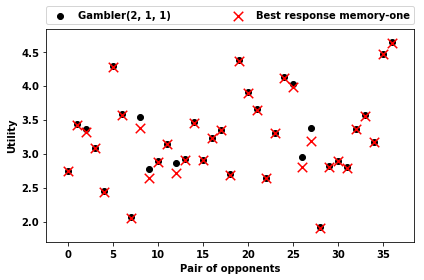

In [47]:
fig, ax = plt.subplots()

plt.scatter(x, df_with_gambler['gambler_utility'], label='Gambler(2, 1, 1)', color='black');
plt.scatter(x, df_with_gambler['mem_one_utility'], marker='x',label='Best response memory-one', color='red', s=90);

plt.ylabel('Utility', fontsize=10, fontweight='bold')
plt.xlabel('Pair of opponents', fontsize=10, fontweight='bold')
lgd = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=2, mode="expand", borderaxespad=0.)

fig.tight_layout()

**History**

**Reactive cycle**

In [50]:
reactive_histories = pd.read_csv('../data/reactive_histories.csv', index_col=0)

In [51]:
p_ones_col = reactive_histories.columns[reactive_histories.columns.str.contains(pat = 'p: 1')] 
p_twos_col = reactive_histories.columns[reactive_histories.columns.str.contains(pat = 'p: 2')] 

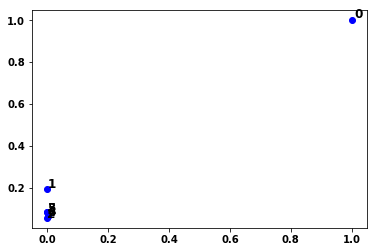

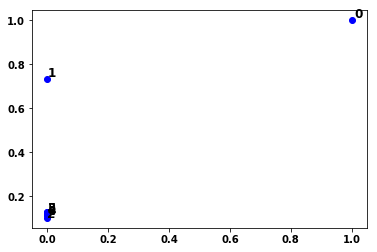

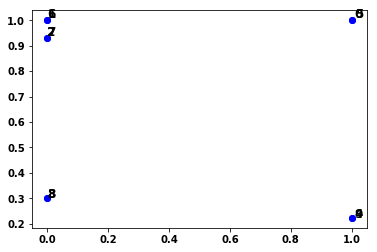

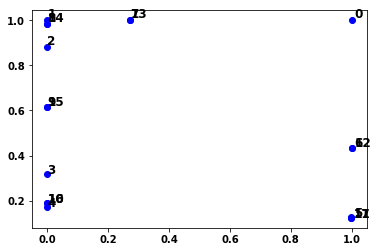

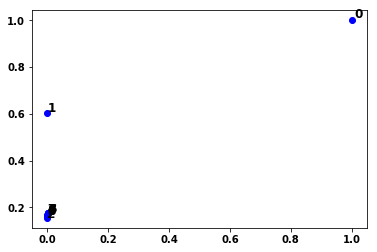

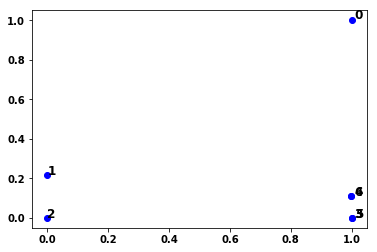

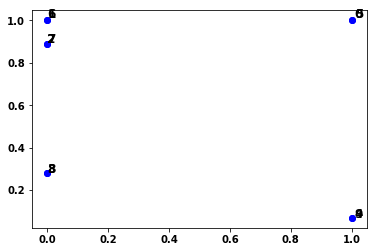

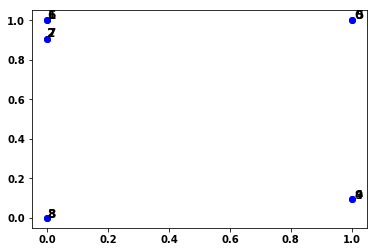

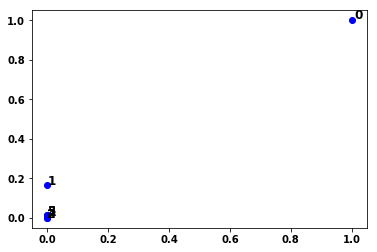

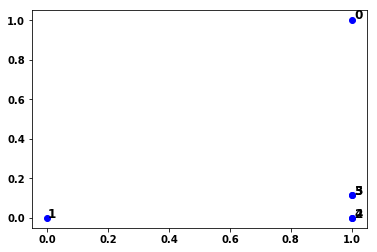

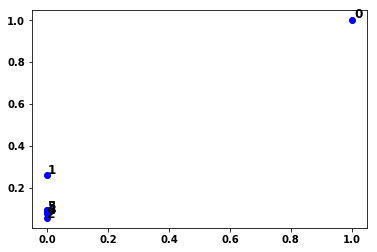

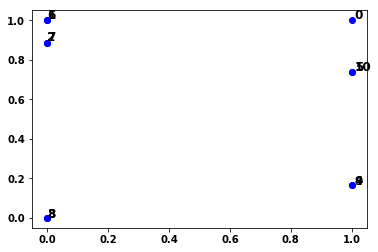

In [52]:
for col_one, col_two in zip(p_ones_col, p_twos_col):
    points = reactive_histories[[col_one, col_two]]
    points = points.dropna().values
    
    fig, ax = plt.subplots()
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        ax.plot(x, y, 'bo')
        ax.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=12)

**Memory one**

In [53]:
mem_histories = pd.read_csv('../data/mem_histories.csv', index_col=0)

In [54]:
p_ones_col   = mem_histories.columns[mem_histories.columns.str.contains(pat = 'p: 1')] 
p_twos_col   = mem_histories.columns[mem_histories.columns.str.contains(pat = 'p: 2')] 
p_threes_col = mem_histories.columns[mem_histories.columns.str.contains(pat = 'p: 3')]
p_fours_col   = mem_histories.columns[mem_histories.columns.str.contains(pat = 'p: 4')] 

/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


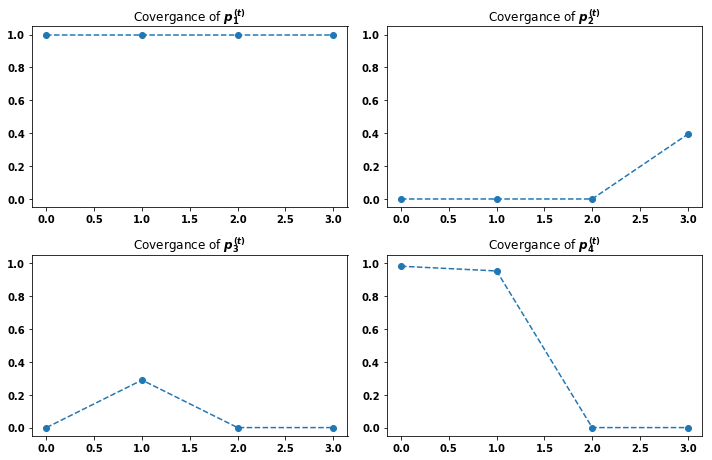

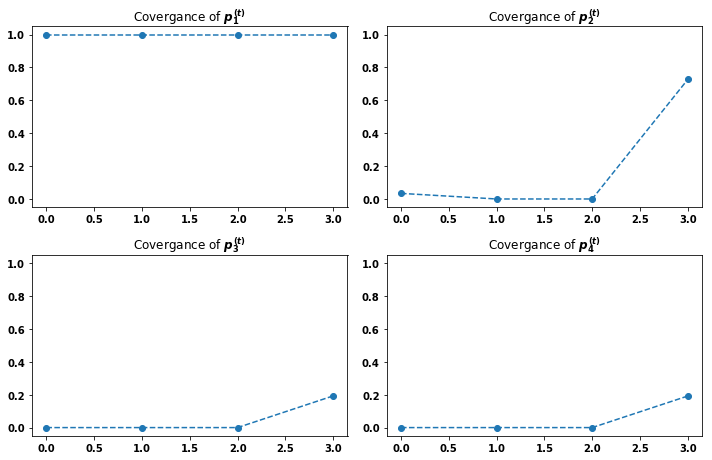

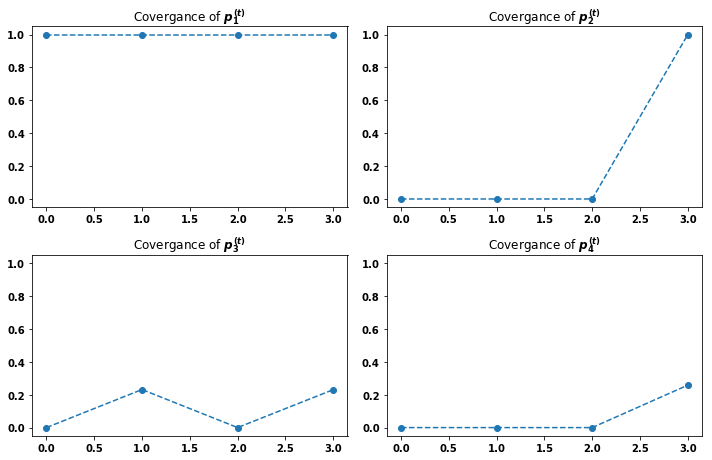

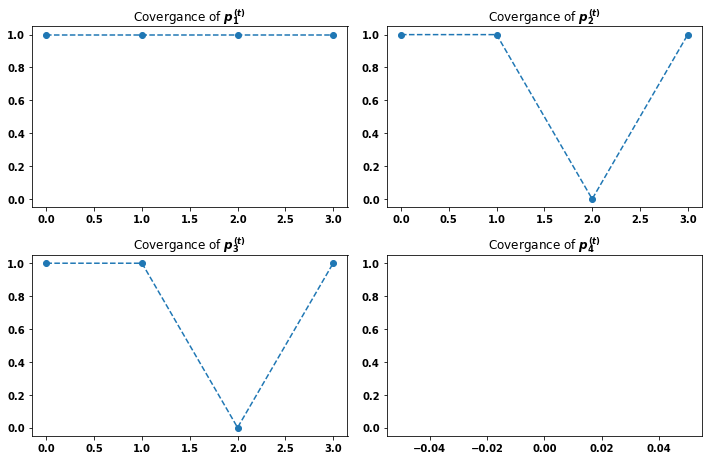

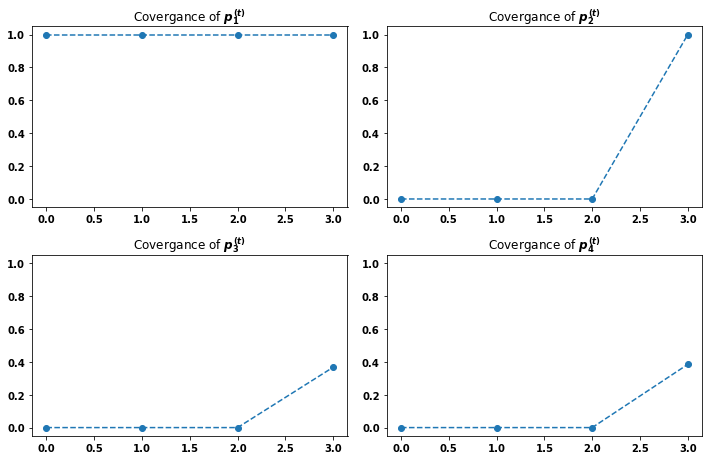

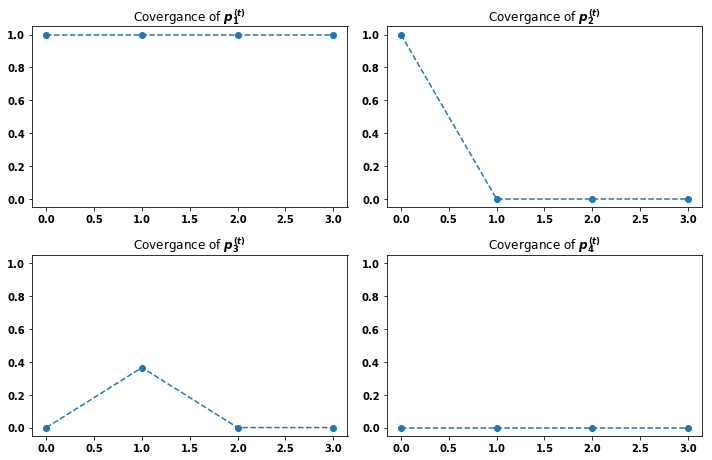

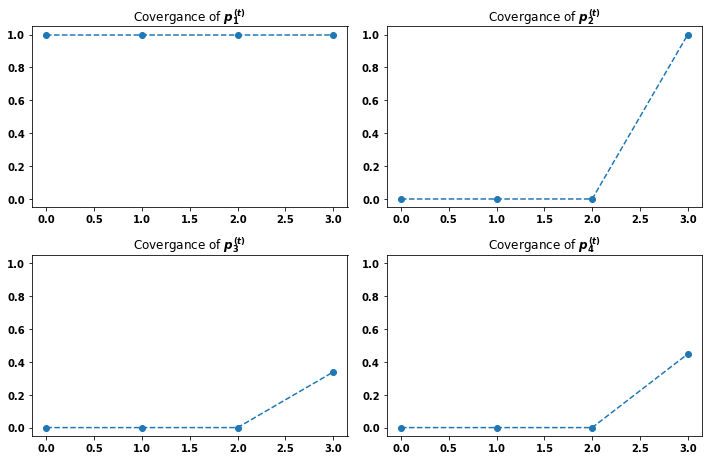

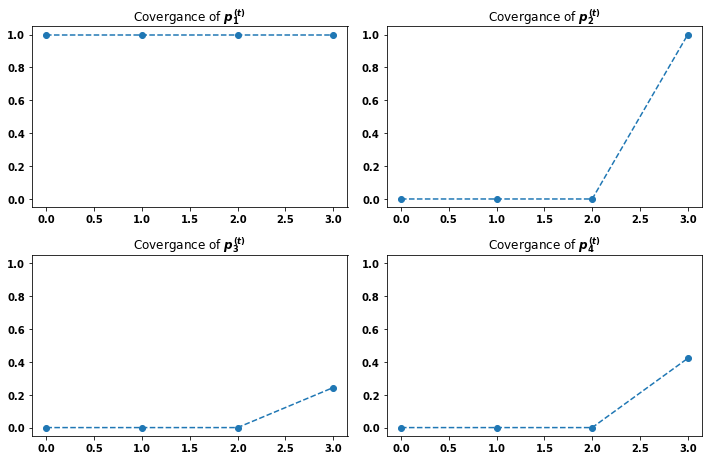

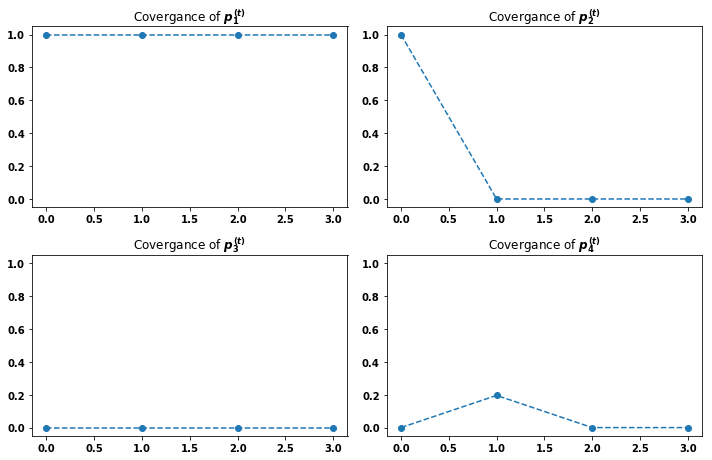

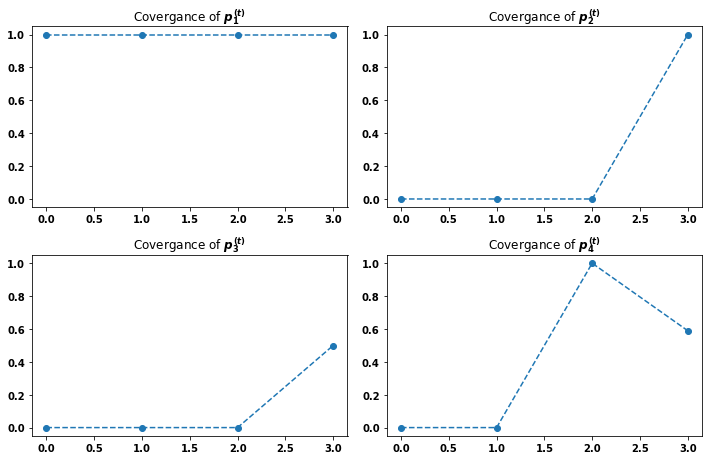

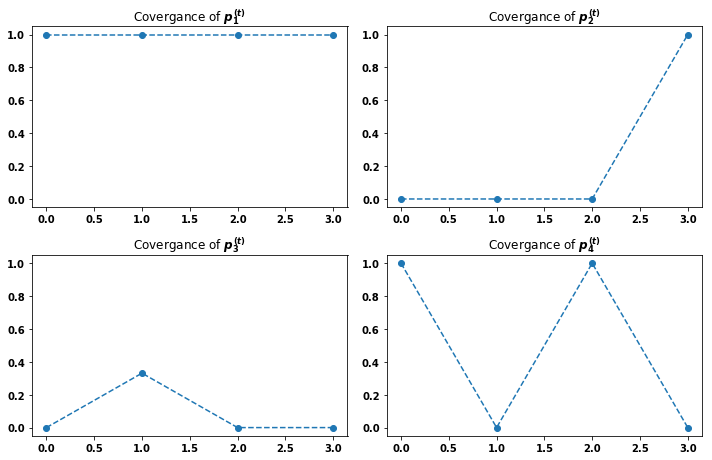

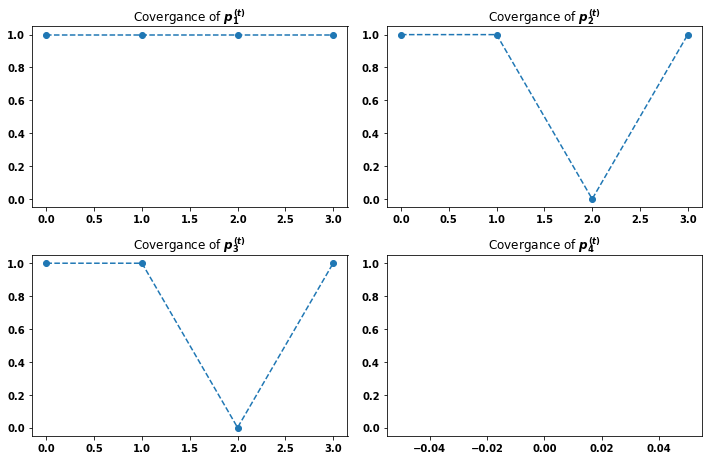

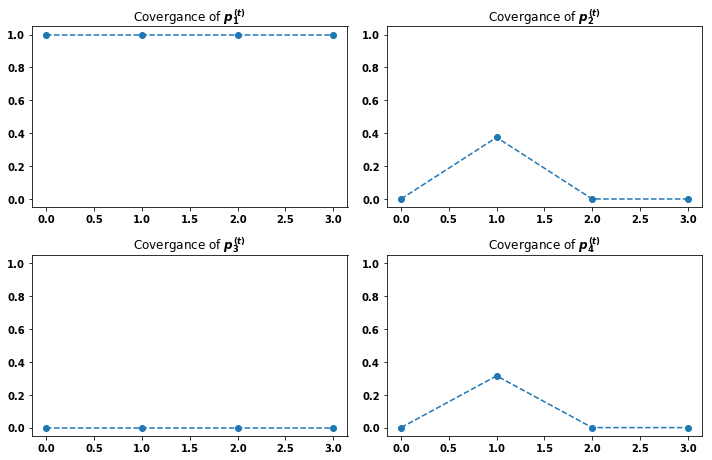

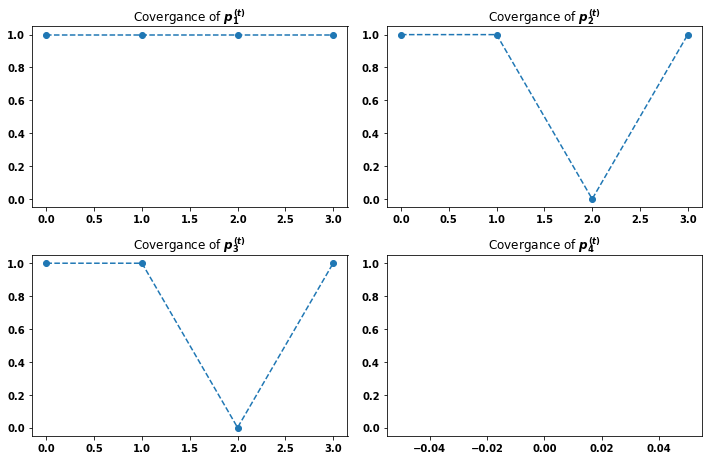

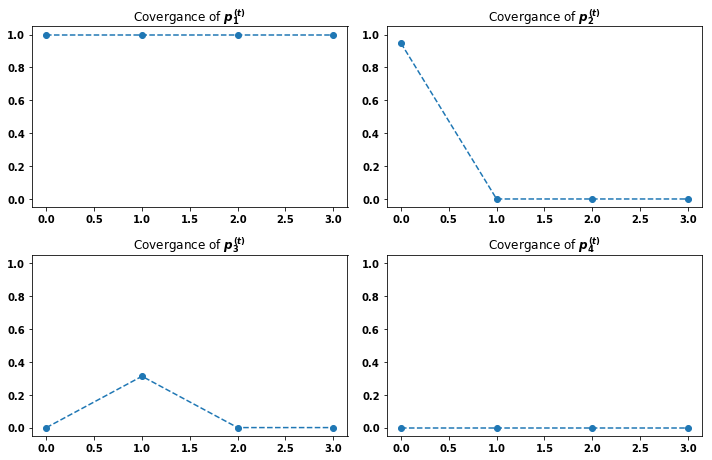

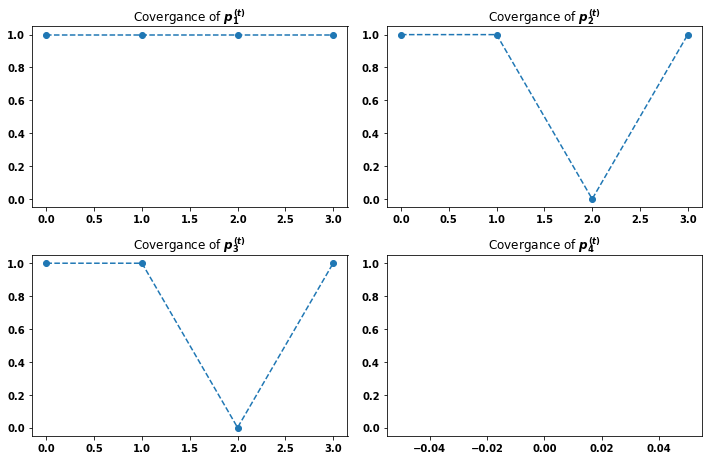

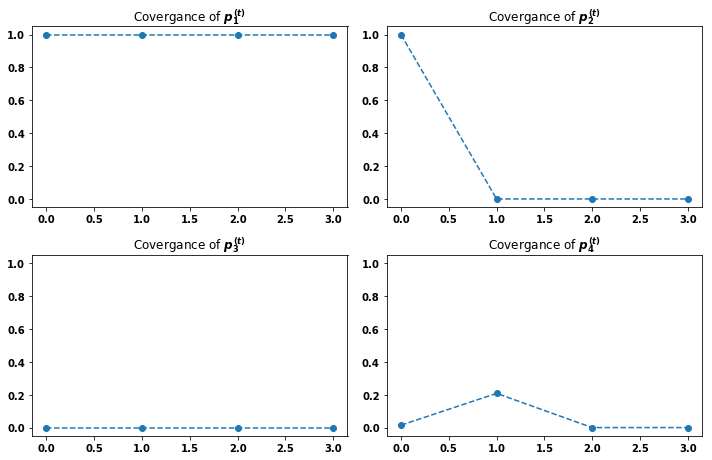

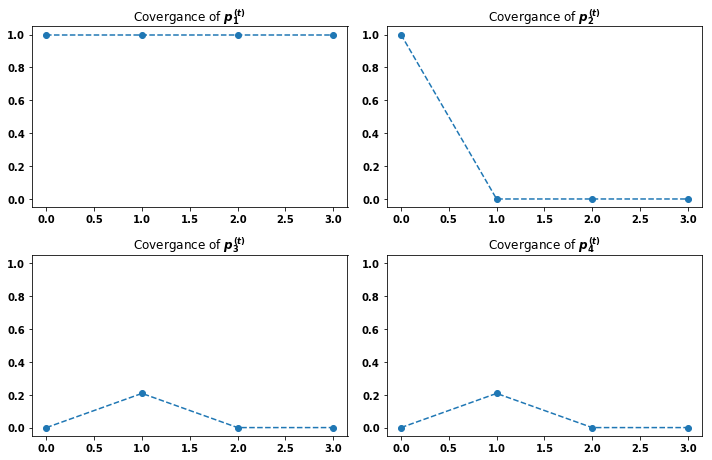

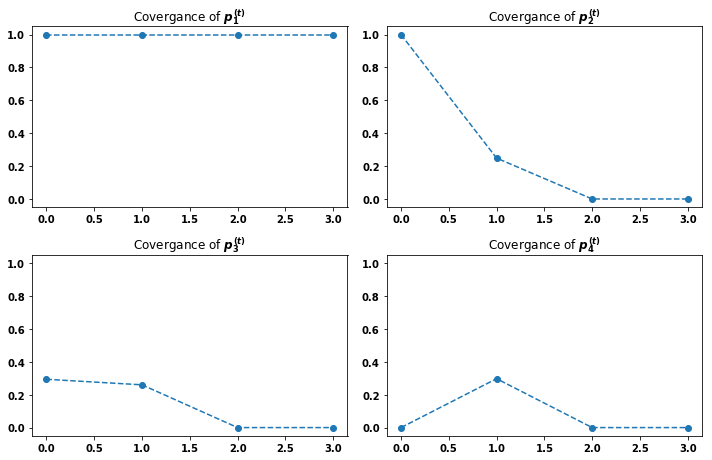

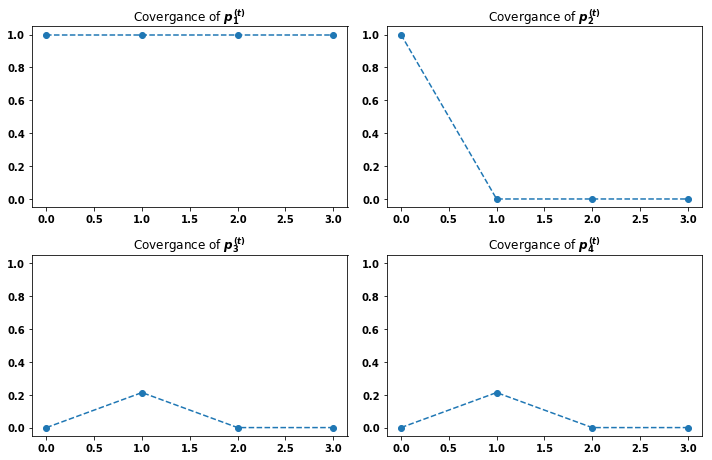

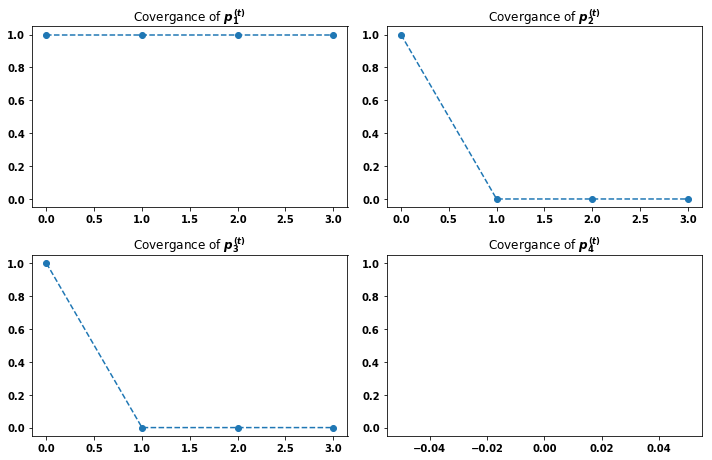

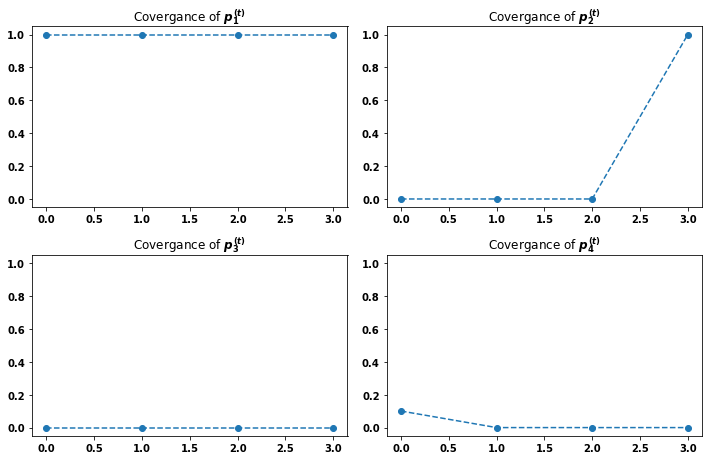

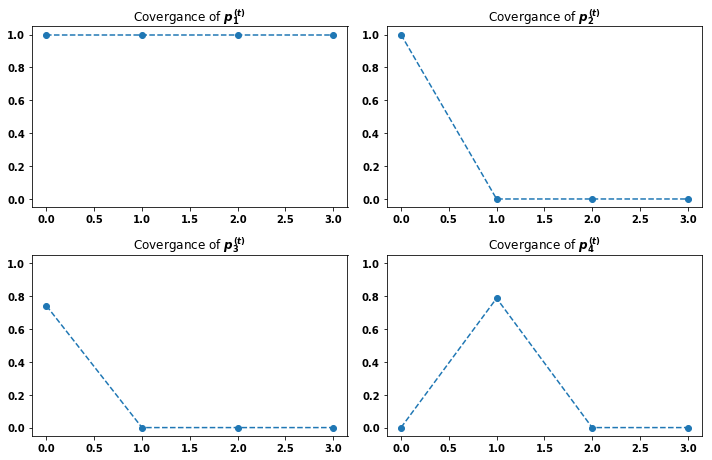

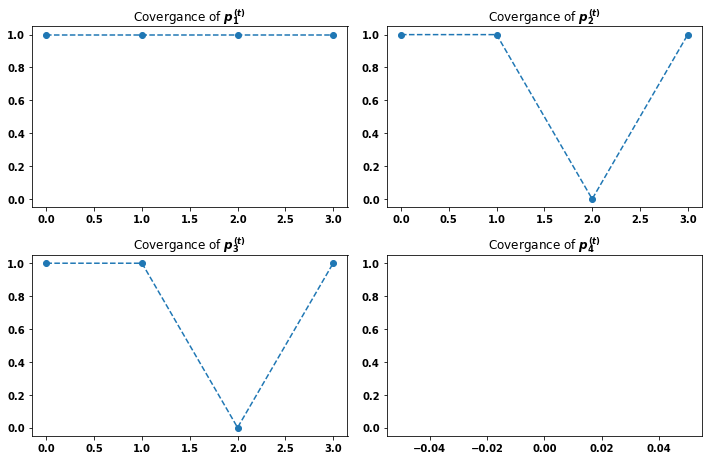

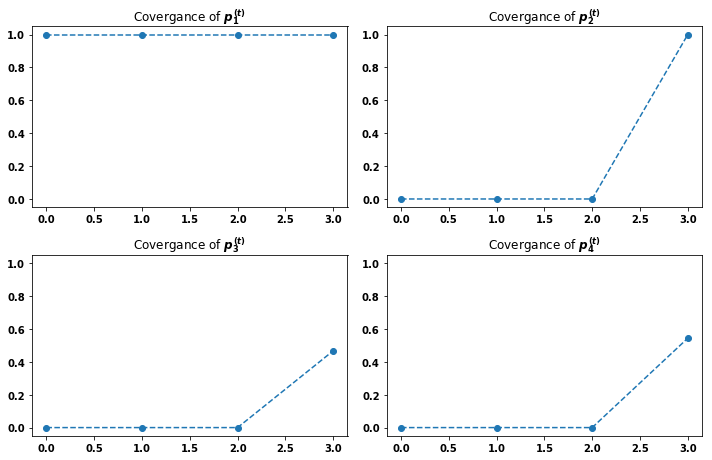

In [55]:
for col_one, col_two, col_three, col_four in zip(p_ones_col, p_twos_col, p_threes_col, p_fours_col):
    
    points = mem_histories[[col_one, col_two, col_three, col_four]].values
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle='--', marker='o',),
        ax[axes].set_title(r'Covergance of $p^{(t)}_%s$' % (i + 1))
        ax[axes].set_ylim(-0.05, 1.05)
        
    fig.tight_layout()